# Задание 1


Выберите 5 языков в википедии (не тех, что использовались в семинаре). Скачайте по 10 случайных статей для каждого языка. Предобработайте тексты, удаляя лишние теги/отступы/разделители (если они есть). Разделите тексты на предложения и создайте датасет, в котором каждому предложению соответствует язык. Кластеризуйте тексты, используя эбмединг модель из прошлого семинара и любой алгоритм кластеризации. Проверьте качество кластеризации с помощь метрики ARI. Отдельно проанализируйте 3 ошибочно кластеризованных текста (если такие есть).

In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=248d49529c44a66c0f31300ad50850700d4410e881d7fd0fde9de3f31f258e1a
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
import wikipedia
import numpy as np

In [3]:
code2lang = wikipedia.languages()
list(code2lang.items())

[('aa', 'Qafár af'),
 ('aae', 'Arbërisht'),
 ('ab', 'аԥсшәа'),
 ('abs', 'bahasa ambon'),
 ('ace', 'Acèh'),
 ('acf', 'Kwéyòl Sent Lisi'),
 ('acm', 'عراقي'),
 ('ady', 'адыгабзэ'),
 ('ady-cyrl', 'адыгабзэ'),
 ('aeb', 'تونسي / Tûnsî'),
 ('aeb-arab', 'تونسي'),
 ('aeb-latn', 'Tûnsî'),
 ('af', 'Afrikaans'),
 ('aln', 'Gegë'),
 ('als', 'Alemannisch'),
 ('alt', 'алтай тил'),
 ('am', 'አማርኛ'),
 ('ami', 'Pangcah'),
 ('an', 'aragonés'),
 ('ang', 'Ænglisc'),
 ('ann', 'Obolo'),
 ('anp', 'अंगिका'),
 ('apc', 'شامي'),
 ('ar', 'العربية'),
 ('arc', 'ܐܪܡܝܐ'),
 ('arn', 'mapudungun'),
 ('arq', 'جازايرية'),
 ('ary', 'الدارجة'),
 ('arz', 'مصرى'),
 ('as', 'অসমীয়া'),
 ('ase', 'American sign language'),
 ('ast', 'asturianu'),
 ('atj', 'Atikamekw'),
 ('av', 'авар'),
 ('avk', 'Kotava'),
 ('awa', 'अवधी'),
 ('ay', 'Aymar aru'),
 ('az', 'azərbaycanca'),
 ('azb', 'تۆرکجه'),
 ('ba', 'башҡортса'),
 ('ban', 'Basa Bali'),
 ('ban-bali', 'ᬩᬲᬩᬮᬶ'),
 ('bar', 'Boarisch'),
 ('bat-smg', 'žemaitėška'),
 ('bbc', 'Batak Toba'),
 ('b

In [4]:
langs = ['udm', 'ce', 'hu', 'kk', 'da']
[(lang, code2lang[lang]) for lang  in langs]

[('udm', 'удмурт'),
 ('ce', 'нохчийн'),
 ('hu', 'magyar'),
 ('kk', 'қазақша'),
 ('da', 'dansk')]

In [5]:
def load_with_disambigution(page):
    try:
        p = wikipedia.page(page)
    except wikipedia.DisambiguationError as e:
        random_option = np.random.choice(e.options)
        p = wikipedia.page(random_option)
    return p

In [6]:
def get_texts_for_lang(lang, n=100): # функция для скачивания статей из википедии
    # вот так можно зафиксировать язык
    wikipedia.set_lang(lang)
    wiki_content = []

    # random достает только ссылки на статьи
    pages = wikipedia.random(n)

    for page_name in pages:
        try:
            # чтобы загрузить контент статьи можно вызвать функцию .page
            page = load_with_disambigution(page_name)

        except Exception as e:
            print('Skipping page {}'.format(page_name), str(e).strip('\n'))
            continue

        wiki_content.append(f'{page.title}\n{page.content.replace("==", "")}')

    return wiki_content

In [7]:
wiki_texts = {}

for lang in langs:
    try:
        wiki_texts[lang] = get_texts_for_lang(lang, 10)
    except Exception as e:
        print('ERROR ON - ', lang, e)
        continue

    print(lang, len(wiki_texts[lang]))

udm 10
ce 10


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skipping page Négy esküvő és egy temetés (egyértelműsítő lap) "Négy esküvő és egy temetés (egyértelműsítő lap)" may refer to: 
Négy esküvő és egy temetés
Négy esküvő és egy temetés
Skipping page Lorenzo de’ Medici Page id "lorenzo de medic" does not match any pages. Try another id!
hu 8
kk 10
da 10


In [8]:
wiki_texts['kk'][0]

'Йақұт Әл-Хамауи\nЙақұт Әл-Хамауи (1178 – 1229) – араб тілді грек ғалымы, тарихшы, филолог, географ. Жас кезінде Бағдадта сириялық көпеске құлдыққа сатылған. Көпес оны мұсылманша оқытып, өзінің сауда агенті етіп тағайындайды. Сауда жұмысымен Парсы шығанағы жағалауын және аралдарын, Араб түбегінің оңтүстігін, Сирияны, ПалестинаПалестинаны, Египетті аралады. Шииттермен қақтығысып, 1216 жылы Дамаскіден қашты. Біраз жылдар бойы Орта Азияның бірқатар қалаларында: Мервте, Ниса мен Хорезмде тұрды. Шыңғыс хан шапқыншылығы кезінде, 1220 жылы Ираққа, одан соң Халебке қашып кетті. Ғұмыр бойы ғылым материалдар жинаған Йақұт Әл-Хамауи 1224 жылы Мосулде “Мужам әл-бүлдан” (“Елдер сөздігі”) атты тарихи-географиялық сөздік жазып шығарды. Мұнда тарихи, этнографиялық, филологиялық және географиялық түрлі материалдар жинақталған. Йақұт Әл-Хамауи сөздігінде 16 мыңдай мақалалар беріліп, 8 – 13 ғасырларға жататын түрлі жазба деректемелер пайдаланылды. Сөздікке Араб халифатындағы елдермен қатар Үндістан, Қыта

In [9]:
import re

def preprocess_text(text):
    # Удаление HTML-тегов
    text = re.sub(r'<.*?>', '', text)

    # Удаление квадратных скобок и их содержимого
    text = re.sub(r'\[.*?\]', '', text)

    # Удаление фигурных скобок и их содержимого
    text = re.sub(r'\{.*?\}', '', text)

    # Удаление множественных пробелов и замена их на один пробел
    text = re.sub(r'\s+', ' ', text)

    # Удаление множественных переносов строк и замена их на один
    text = re.sub(r'\n+', '\n', text)

    # Удаление пробелов в начале и конце строк
    text = re.sub(r'^\s+|\s+$', '', text, flags=re.MULTILINE)

    return text.strip()

In [10]:
for lang in langs:
    for i in range(len(wiki_texts[lang])):
        wiki_texts[lang][i] = preprocess_text(wiki_texts[lang][i])

In [11]:
wiki_texts['kk'][0]

'Йақұт Әл-Хамауи Йақұт Әл-Хамауи (1178 – 1229) – араб тілді грек ғалымы, тарихшы, филолог, географ. Жас кезінде Бағдадта сириялық көпеске құлдыққа сатылған. Көпес оны мұсылманша оқытып, өзінің сауда агенті етіп тағайындайды. Сауда жұмысымен Парсы шығанағы жағалауын және аралдарын, Араб түбегінің оңтүстігін, Сирияны, ПалестинаПалестинаны, Египетті аралады. Шииттермен қақтығысып, 1216 жылы Дамаскіден қашты. Біраз жылдар бойы Орта Азияның бірқатар қалаларында: Мервте, Ниса мен Хорезмде тұрды. Шыңғыс хан шапқыншылығы кезінде, 1220 жылы Ираққа, одан соң Халебке қашып кетті. Ғұмыр бойы ғылым материалдар жинаған Йақұт Әл-Хамауи 1224 жылы Мосулде “Мужам әл-бүлдан” (“Елдер сөздігі”) атты тарихи-географиялық сөздік жазып шығарды. Мұнда тарихи, этнографиялық, филологиялық және географиялық түрлі материалдар жинақталған. Йақұт Әл-Хамауи сөздігінде 16 мыңдай мақалалар беріліп, 8 – 13 ғасырларға жататын түрлі жазба деректемелер пайдаланылды. Сөздікке Араб халифатындағы елдермен қатар Үндістан, Қытай

In [13]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
df_dict = []

In [20]:
unique_text_id = 0

for lang in langs:
    for i in range(len(wiki_texts[lang])):
        curr_sents = sent_tokenize(wiki_texts[lang][i])
        for sent in curr_sents:
            df_dict.append({'lang': lang, 'sent': sent, 'text_id': unique_text_id})
        unique_text_id += 1

In [21]:
import pandas as pd

df = pd.DataFrame(df_dict)
df

,lang,sent,text_id
0,udm,Кадиевка Кадиевка (укр.,0
1,udm,"Кадіївка, ӟуч Кадиевка) — Украинаысь Лугаснск ...",0
2,udm,Улӥсьёс — 90 152 адями (2001 ар).,0
3,udm,Валэктонъёс,0
4,udm,Маршалл шормуӵъёс Маршалл Шормуӵъёс Республика...,1
...,...,...,...
488,da,Siden 1888 var han medlem af første kammer.,46
489,da,"Kilder Kappeyne van de Copello, Jan i Salmonse...",46
490,da,Buftea Buftea er en by i det sydlige Rumænien ...,47
491,da,Buftea er hovedsæde i distriktet Ilfov.,47


In [22]:
grouped_df = df.groupby('text_id')[['lang', 'sent']]

In [26]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 4.4 MB/s eta 0:00:00


In [27]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [28]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [29]:
ARI = []

for key, _ in grouped_df:
    # вытаскиваем контексты
    texts = grouped_df.get_group(key)['sent'].values

    # создаем пустую матрицу для векторов
    X = np.zeros((len(texts), 768))

    # переводим тексты в векторы и кладем в матрицу
    for i, text in enumerate(texts):
        X[i] = model.encode(text)

    # выбираем один из алгоритмов
    # cluster = AffinityPropagation(damping=0.9)
    # cluster = KMeans(3)
    cluster = DBSCAN(min_samples=1, eps=0.1)

    cluster.fit(X)
    labels = np.array(cluster.labels_)+1

    # расчитываем метрику для отдельного слова
    ARI.append(adjusted_rand_score(grouped_df.get_group(key)['lang'], labels))

print(np.mean(ARI)) # усредненная метрика

0.041666666666666664


# Задание 2

Загрузите корпус `annot.opcorpora.no_ambig_strict.xml.bz2` с OpenCorpora. Найдите в корпусе самые частотные морфологически омонимичные словоформы (те, которым соответствует разный грамматический разбор в разных предложениях). Также найдите словоформы с самых большим количеством вариантов грамматических разборов.

In [30]:
!wget https://opencorpora.org/files/export/annot/annot.opcorpora.no_ambig_strict.xml.bz2

--2024-10-10 10:08:34--  https://opencorpora.org/files/export/annot/annot.opcorpora.no_ambig_strict.xml.bz2
Resolving opencorpora.org (opencorpora.org)... 104.21.15.199, 172.67.163.210, 2606:4700:3030::6815:fc7, ...
Connecting to opencorpora.org (opencorpora.org)|104.21.15.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1435269 (1.4M) [application/x-bzip2]
Saving to: ‘annot.opcorpora.no_ambig_strict.xml.bz2’

annot.opcorpora.no_ 100%[===================>]   1.37M  2.27MB/s    in 0.6s    

2024-10-10 10:08:35 (2.27 MB/s) - ‘annot.opcorpora.no_ambig_strict.xml.bz2’ saved [1435269/1435269]



In [31]:
import bz2

with bz2.open('annot.opcorpora.no_ambig_strict.xml.bz2', 'rb') as f_in, open('annot.opcorpora.no_ambig_strict.xml', 'wb') as f_out:
    f_out.write(f_in.read())

In [32]:
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 17.0 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=7b860a7acf31467d575c11b2c7efd3710c6f278cce3cde14818a7e7729fb2846
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [33]:
from lxml import etree
from pymorphy2 import MorphAnalyzer
from sklearn.metrics import classification_report

In [34]:
open_corpora = etree.fromstring(open('annot.opcorpora.no_ambig_strict.xml', 'rb').read())

In [35]:
sents = open_corpora.xpath('//tokens')

In [36]:
tokens = sents[0].xpath('token')

In [38]:
corpus = []

for sentence in open_corpora.xpath('//tokens'):
    sent_tagged = []
    for token in sentence.xpath('token'):
        word = token.xpath('@text')
        gram_info = token.xpath('tfr/v/l/g/@v')
        sent_tagged.append([word[0]] + gram_info)

    corpus.append(sent_tagged)

In [39]:
corpus[0:5]

[[['«', 'PNCT'],
  ['Школа', 'NOUN', 'inan', 'femn', 'sing', 'nomn'],
  ['злословия', 'NOUN', 'inan', 'neut', 'sing', 'gent'],
  ['»', 'PNCT'],
  ['учит', 'VERB', 'impf', 'tran', 'sing', '3per', 'pres', 'indc'],
  ['прикусить', 'INFN', 'perf', 'tran'],
  ['язык', 'NOUN', 'inan', 'masc', 'sing', 'accs']],
 [['Сохранится', 'VERB', 'perf', 'intr', 'sing', '3per', 'futr', 'indc'],
  ['ли', 'PRCL'],
  ['градус', 'NOUN', 'inan', 'masc', 'sing', 'nomn'],
  ['дискуссии', 'NOUN', 'inan', 'femn', 'sing', 'gent'],
  ['в', 'PREP'],
  ['новом', 'ADJF', 'Qual', 'masc', 'sing', 'loct'],
  ['сезоне', 'NOUN', 'inan', 'masc', 'sing', 'loct'],
  ['?', 'PNCT']],
 [['Великолепная', 'ADJF', 'Qual', 'femn', 'sing', 'nomn'],
  ['«', 'PNCT'],
  ['Школа', 'NOUN', 'inan', 'femn', 'sing', 'nomn'],
  ['злословия', 'NOUN', 'inan', 'neut', 'sing', 'gent'],
  ['»', 'PNCT'],
  ['вернулась', 'VERB', 'perf', 'intr', 'femn', 'sing', 'past', 'indc'],
  ['в', 'PREP'],
  ['эфир', 'NOUN', 'inan', 'masc', 'sing', 'accs'],
  [

In [40]:
word_forms_freq = {}

for sentence in corpus:
    for word in sentence:
        if word[0] not in word_forms_freq:
            word_forms_freq[word[0]] = set()
            word_meanings = set()
            for word_meaning in word[1:]:
                if word_meaning not in word_meanings:
                    word_meanings.add(word_meaning)
            word_forms_freq[word[0]].add(tuple(word_meanings))
        else:
            word_meanings2 = set()
            for word_meaning2 in word[1:]:
                if word_meaning2 not in word_meanings2:
                    word_meanings2.add(word_meaning2)
            word_forms_freq[word[0]].add(tuple(word_meanings2))

In [45]:
word_forms_max_meanings = {}
max_meanings_wordform = set()
max_meanings_digit = int(0)
for wordform in word_forms_freq:
    word_forms_max_meanings[wordform] = len(word_forms_freq[wordform])

for wordform in word_forms_max_meanings:
    if word_forms_max_meanings[wordform] > max_meanings_digit:
        max_meanings_digit = word_forms_max_meanings[wordform]

for wordform in word_forms_max_meanings:
    if word_forms_max_meanings[wordform] == max_meanings_digit:
        max_meanings_wordform.add(wordform)

In [46]:
max_meanings_wordform

{'США'}

Самым омонимичным словом оказалось `США`

In [47]:
wordforms_omon = set()

for wordform in word_forms_freq:
    if len(word_forms_freq[wordform]) >= 2: # Ищем слова с 2 и более значениями
        wordforms_omon.add(wordform)

wordforms_omon = tuple(wordforms_omon)

wordform_count = {word: 0 for word in wordforms_omon}

for sentence in corpus:
    for word in sentence:
        if word[0] in wordforms_omon:
            wordform_count[word[0]] += 1

sorted_wordforms_omon = sorted(wordform_count, key=wordform_count.get, reverse=True)[:10] # Сортируем и выводим топ-10 словоформ

for wordform in sorted_wordforms_omon:
    print(f"Wordform: {wordform}, count: {wordform_count[wordform]}")

Wordform: в, count: 1583
Wordform: на, count: 686
Wordform: с, count: 536
Wordform: и, count: 507
Wordform: году, count: 115
Wordform: этом, count: 104
Wordform: России, count: 90
Wordform: было, count: 84
Wordform: может, count: 65
Wordform: А, count: 58


Ответ был ожидаем, большинство оказались предлоги. Как вариант можно дополнительно почистить стоп-словами.

## Задание 3
Загрузите один и з файлов корпуса Syntagrus - https://github.com/UniversalDependencies/UD_Russian-SynTagRus/tree/master (можно взять тестовый)

Преобразуйте все разборы предложений в графовые структуры через DependencyGraph, выберите 3 любых отношения и для каждого найдите топ-5 самых встречаемых пар слов, связанных этим отношением.

Для самой частотной пары слов в каждом из отношений вытащите все подзависимые слова для каждого из них во всех предложениях (используя `flatten(get_subtree(d.nodes, index_of_a_word)` и сортируя результат по порядку слов в предложениях, аналогично тому как я делал с summaries только у вас будет два слова)
В итоге у вас должен получится что-то такое:

```
### отношение
relation_name

### топ 5 пар слов связанных этим отношением
(word1, word2), (word3, word4), (word5, word6), (word7, word8), (word9, word10)

### подзависимые для самого частотного
(subword word1 subword, word2 subword subword)

... (и так три раза)
```


In [48]:
!wget https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/refs/heads/master/ru_syntagrus-ud-test.conllu

--2024-10-10 10:27:22--  https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/refs/heads/master/ru_syntagrus-ud-test.conllu
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/refs/heads/master/ru_syntagrus-ud-test.conllu [following]
--2024-10-10 10:27:22--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/refs/heads/master/ru_syntagrus-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14970966 (14M) [text/plain]
Saving to: ‘ru_syntagrus-ud-test.conllu’

ru_syntagrus-ud-tes 100%[===================>]  14

In [49]:
file = open('ru_syntagrus-ud-test.conllu', 'r', encoding='utf-8').read()
tree = [x for x in file.split('\n\n')[0].split('\n')]
tree

['# sent_id = 2003Armeniya.xml_1',
 '# text = В советский период времени число ИТ- специалистов в Армении составляло около десяти тысяч.',
 '1\tВ\tв\tADP\t_\t_\t3\tcase\t3:case\t_',
 '2\tсоветский\tсоветский\tADJ\t_\tAnimacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing\t3\tamod\t3:amod\t_',
 '3\tпериод\tпериод\tNOUN\t_\tAnimacy=Inan|Case=Acc|Gender=Masc|Number=Sing\t11\tobl\t11:obl:в:acc\t_',
 '4\tвремени\tвремя\tNOUN\t_\tAnimacy=Inan|Case=Gen|Gender=Neut|Number=Sing\t3\tnmod\t3:nmod:gen\t_',
 '5\tчисло\tчисло\tNOUN\t_\tAnimacy=Inan|Case=Acc|Gender=Neut|Number=Sing\t11\tobj\t11:obj\t_',
 '6\tИТ\tИТ\tPROPN\t_\tAnimacy=Inan|Case=Nom|Gender=Neut|Number=Sing\t8\tcompound\t8:compound\tSpaceAfter=No',
 '7\t-\t-\tPUNCT\t_\t_\t6\tpunct\t6:punct\t_',
 '8\tспециалистов\tспециалист\tNOUN\t_\tAnimacy=Anim|Case=Gen|Gender=Masc|Number=Plur\t5\tnmod\t5:nmod:gen\t_',
 '9\tв\tв\tADP\t_\t_\t10\tcase\t10:case\t_',
 '10\tАрмении\tАрмения\tPROPN\t_\tAnimacy=Inan|Case=Loc|Gender=Fem|Number=Sing\t5\tnmod

In [50]:
trees = []

parsed_sents = open('ru_syntagrus-ud-test.conllu', 'r', encoding='utf-8').read().split('\n\n')

for sent in parsed_sents:
    try:
        tree = [line for line in sent.split('\n') if line[0] != '#']
        trees.append('\n'.join(tree))
    except IndexError as e:
        print(e)

string index out of range


In [51]:
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph

In [52]:
dgraphs = []
counter = 0
for x in trees:
    try:
        dgraph = DependencyGraph(x)
        dgraphs.append(dgraph)
    except Exception as e:
        print(e)

/usr/local/lib/python3.10/dist-packages/nltk/parse/dependencygraph.py:376: UserWarning: The graph doesn't contain a node that depends on the root element.
  warnings.warn(


In [54]:
from collections import Counter

word_pairs_case_count = Counter()
for dgraph in dgraphs:
    dgraph.root = dgraph.nodes[0]
    triples = list(dgraph.triples())
    for e1, rel, e2 in triples:
        if rel == 'case':
            word_pair = (e1, e2)
            word_pairs_case_count[word_pair] += 1

In [56]:
most_common_pairs = word_pairs_case_count.most_common(10)

In [57]:
most_common_pairs

[((('году', 'NOUN'), ('в', 'ADP')), 98),
 ((('нас', 'PRON'), ('у', 'ADP')), 70),
 ((('том', 'PRON'), ('о', 'ADP')), 59),
 ((('России', 'PROPN'), ('в', 'ADP')), 59),
 ((('году', 'NOUN'), ('В', 'ADP')), 57),
 ((('том', 'PRON'), ('в', 'ADP')), 57),
 ((('время', 'NOUN'), ('в', 'ADP')), 39),
 ((('того', 'PRON'), ('Кроме', 'ADP')), 38),
 ((('них', 'PRON'), ('из', 'ADP')), 34),
 ((('случае', 'NOUN'), ('в', 'ADP')), 30)]

In [58]:
def flatten(l):
    flat = []
    for el in l:
        if not isinstance(el, list):
            flat.append(el)
        else:
            flat += flatten(el)
    return flat

In [59]:
def get_subtree(nodes, node):
    if not nodes[node]['deps']:
        return [node]
    else:
        return [node] + [get_subtree(nodes, dep) for rel in nodes[node]['deps']
                         if rel != 'punct'
                         for dep in nodes[node]['deps'][rel]]

In [60]:
word1 = 'в' # Первое по частотности
word2 = 'году' # Второе по частотности
dep_word1 = set()
dep_word2 = set()

for dgraph in dgraphs:
    for node in dgraph.nodes:
        if dgraph.nodes[node]['word'] == word1:
            dep_words = [dgraph.nodes[i]['word'] for i in flatten(get_subtree(dgraph.nodes, node))]
            for x in dep_words:
                dep_word1.add(x)
        if dgraph.nodes[node]['word'] == word2:
            dep_words = [dgraph.nodes[i]['word'] for i in flatten(get_subtree(dgraph.nodes, node))]
            for x in dep_words:
                dep_word2.add(x)

dep_word1 = tuple(dep_word1)
dep_word2 = tuple(dep_word2)

In [63]:
most_common_pair_and_dependants = {'word1': set(dep_word1) - set(word1), 'word2': set(dep_word2) - set(word2)}
most_common_pair_and_dependants

{'word1': {'бутылкой',
  'виде',
  'виду',
  'время',
  'если',
  'как',
  'качестве',
  'конце',
  'концов',
  'коньяка',
  'настоящее',
  'обнимку',
  'общей',
  'одиночку',
  'особенности',
  'от',
  'отличие',
  'отношении',
  'очередь',
  'первую',
  'противном',
  'с',
  'связи',
  'сложности',
  'случае',
  'соответствии',
  'течение',
  'то',
  'угоду',
  'ходе',
  'частности'},
 'word2': {'1508',
  '1512',
  '1551',
  '1567',
  '1703',
  '1785',
  '1790',
  '1805',
  '1807',
  '1815',
  '1821',
  '1833',
  '1841',
  '1868',
  '1875',
  '1876',
  '1882',
  '1888',
  '1894',
  '1896',
  '1897',
  '1899',
  '1901',
  '1903',
  '1904',
  '1906',
  '1908',
  '1919',
  '1923',
  '1926',
  '1928',
  '1931',
  '1932',
  '1933',
  '1934',
  '1937',
  '1939',
  '1940',
  '1941',
  '1943',
  '1946',
  '1947',
  '1948',
  '1949',
  '1950',
  '1951',
  '1952',
  '1956',
  '1958',
  '1960',
  '1961',
  '1962',
  '1964',
  '1968',
  '1974',
  '1977',
  '1981',
  '1983',
  '1984',
  '1985',
 

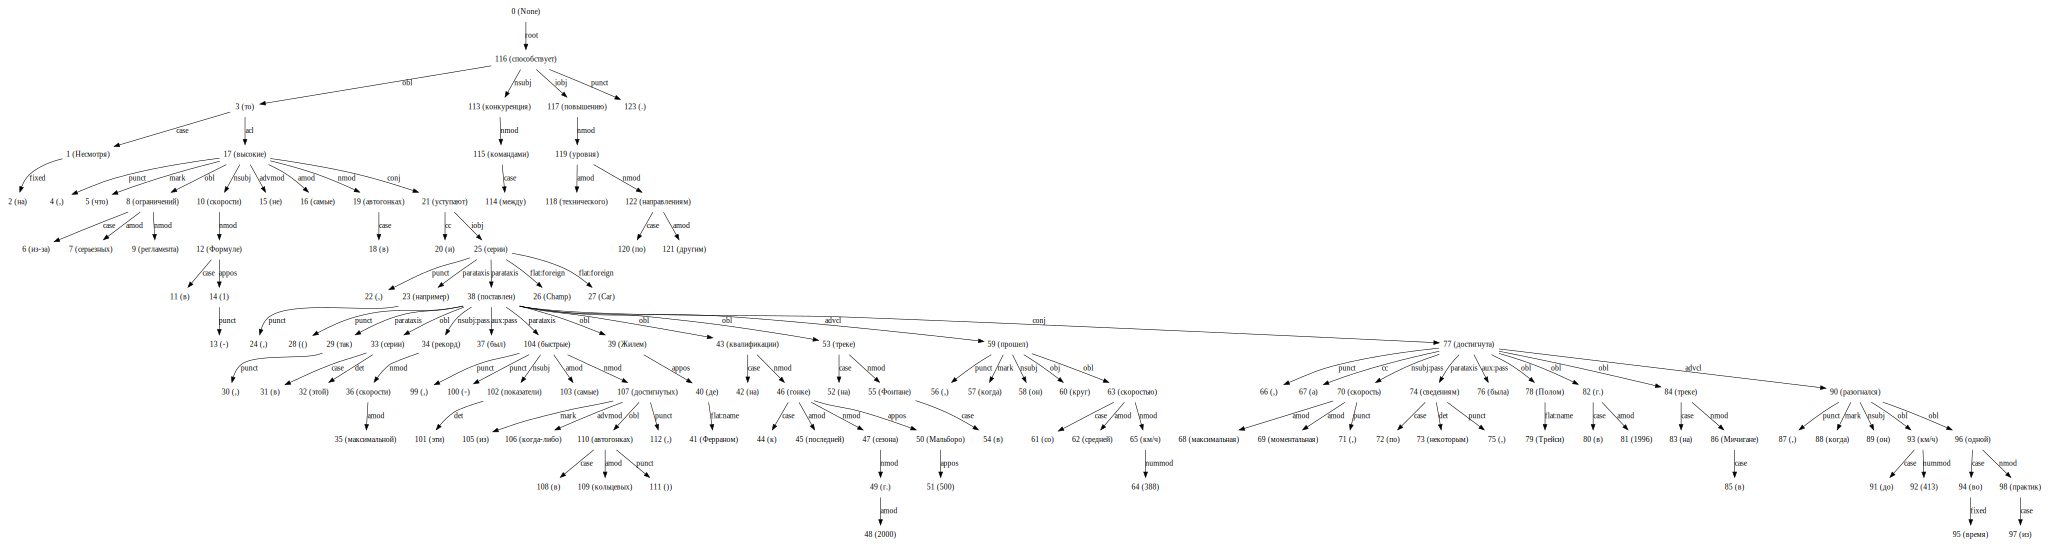

In [65]:
longest_sentence = max(dgraphs, key=lambda x: len(x.nodes))
longest_sentence